In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

/home/kasper/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Load Data
data = pd.read_csv("FC_plus_RES_withPredictions.csv")
data = data.drop('Unnamed: 0', 1)
data.score_drug_gene_threshold = data.score_drug_gene_threshold.astype('category')


In [33]:
data.describe()

,Percent Peptide,Amino Acid Cut position,score_drug_gene_rank,predictions
count,5310.000000,5310.000000,5310.000000,5310.000000
mean,48.355836,722.085683,0.502886,0.502408
std,27.800159,690.734986,0.287511,0.144368
min,0.050000,1.000000,0.001082,-0.016217
25%,25.270000,186.000000,0.255411,0.417021
50%,48.225000,435.500000,0.503272,0.519049
75%,71.765000,1157.000000,0.751082,0.607194
max,101.000000,2826.000000,1.000000,0.878146


In [34]:
df1 = data.ix[:,0:2]
df1.describe()
#De 17 unique target genes we expected

,30mer,Target gene
count,5310,5310
unique,4379,17
top,CACTGCAGCCAATCCTGTGACAGACGGACC,MED12
freq,8,1848


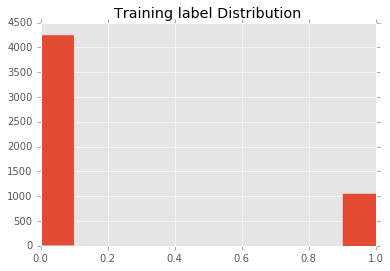

In [35]:
data.score_drug_gene_threshold.hist()
plt.title("Training label Distribution")

In [37]:
pd.options.display.max_colwidth = 500
data.head()

,30mer,Target gene,Percent Peptide,Amino Acid Cut position,score_drug_gene_rank,score_drug_gene_threshold,drug,predictions
0,CAGAAAAAAAAACACTGCAACAAGAGGGTA,CD5,72.87,360.0,0.083682,0,nodrug,0.544412
1,TTTTAAAAAACCTACCGTAAACTCGGGTCA,NF1,65.80,1868.0,0.868207,1,PLX_2uM,0.617512
2,TCAGAAAAAGCAGCGTCAGTGGATTGGCCC,CD5,84.21,416.0,0.184100,0,nodrug,0.476232
3,AATAAAAAATAGGATTCCCAGCTTTGGAAG,NF1,56.39,1601.0,0.432065,0,PLX_2uM,0.459882
4,GATGAAAAATATGTAAACAGCATTTGGGAC,CUL3,4.30,33.0,0.149351,0,PLX_2uM,0.290841


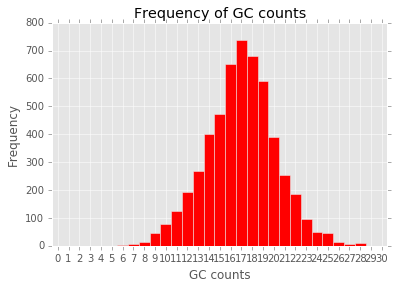

In [79]:
frequencies = np.zeros(31)

for counts in data['30mer']:
    c = 0
    g = 0
    for letter in counts:
        if letter == 'C':
            c += 1
        if letter == 'G':
            g += 1
    frequencies[g+c] +=1
    
labels = range(0,31)

pos = np.arange(len(labels))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(labels)
ax.set_ylabel('Frequency')
ax.set_xlabel('GC counts')
ax.set_title('Frequency of GC counts')

plt.bar(pos, frequencies, width, color='r')
plt.show()

In [5]:
# print most frequently occurring 30mer
# This 30mer corresponds to two cut positions.
# And there are 4 duplicates for each cut position! 
data.loc[data['30mer'] == 'CACTGCAGCCAATCCTGTGACAGACGGACC']

,30mer,Target gene,Percent Peptide,Amino Acid Cut position,score_drug_gene_rank,score_drug_gene_threshold,drug,predictions
3025,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,33.67,133.0,1.0,1,nodrug,0.629544
3026,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,35.95,142.0,1.0,1,nodrug,0.629544
3027,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,33.67,133.0,1.0,1,nodrug,0.629544
3028,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,35.95,142.0,1.0,1,nodrug,0.629544
3029,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,33.67,133.0,1.0,1,nodrug,0.629544
3030,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,35.95,142.0,1.0,1,nodrug,0.629544
3031,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,33.67,133.0,1.0,1,nodrug,0.629544
3032,CACTGCAGCCAATCCTGTGACAGACGGACC,CD43,35.95,142.0,1.0,1,nodrug,0.629544
